In [3]:
import sys
from pygod.metric import eval_roc_auc
sys.path.append('..')
from torch_geometric.utils import to_networkx
from matplotlib import pyplot as plt
import networkx as nx
from Utils.experiment_results import Experiment

from experiments import run_local_dice


experiment_before_poison, experiment_after_poison, node_idxs, y_binary = run_local_dice()






tensor([False, False, False,  ..., False, False, False])
node_attrs
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
adj
SparseTensor(row=tensor([   0,    0,    0,  ..., 2707, 2707, 2707]),
             col=tensor([ 633, 1862, 2582,  ...,  598, 1473, 2706]),
             val=tensor([1., 1., 1.,  ..., 1., 1., 1.]),
             size=(2708, 2708), nnz=11054, density=0.15%)
labels
tensor([0, 0, 0,  ..., 0, 0, 0])
These are the node_idxs: $[760, 1740, 394, 906, 1619, 724, 2240, 1833, 1601, 662, 190, 1552, 1239, 571, 667, 1884, 804, 403, 2538, 2178, 2009, 2247, 1605, 2691, 434, 195, 1386, 2477, 739, 61, 1737, 1690, 727, 324, 1097, 1511, 2120, 234, 851, 1780, 880, 493, 2498, 2553, 1494, 512, 1420, 1922, 692, 1181, 442, 2684, 1301, 1262, 1704, 784, 871, 818, 606, 476, 1678, 441, 1274, 1763, 642, 927, 896, 2595, 1018, 2612, 211, 535, 1157, 1615, 2605]
auc before poison:
0.7686375683753455

found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found yellow prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found yellow prob
found yellow prob
found orange prob
found yellow prob
found orange prob
found orange prob
found orange prob
found yellow prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found yellow prob
found orange prob
found orange prob
found orange prob
found orange prob
found yellow prob
found yellow prob
found orange prob
found oran

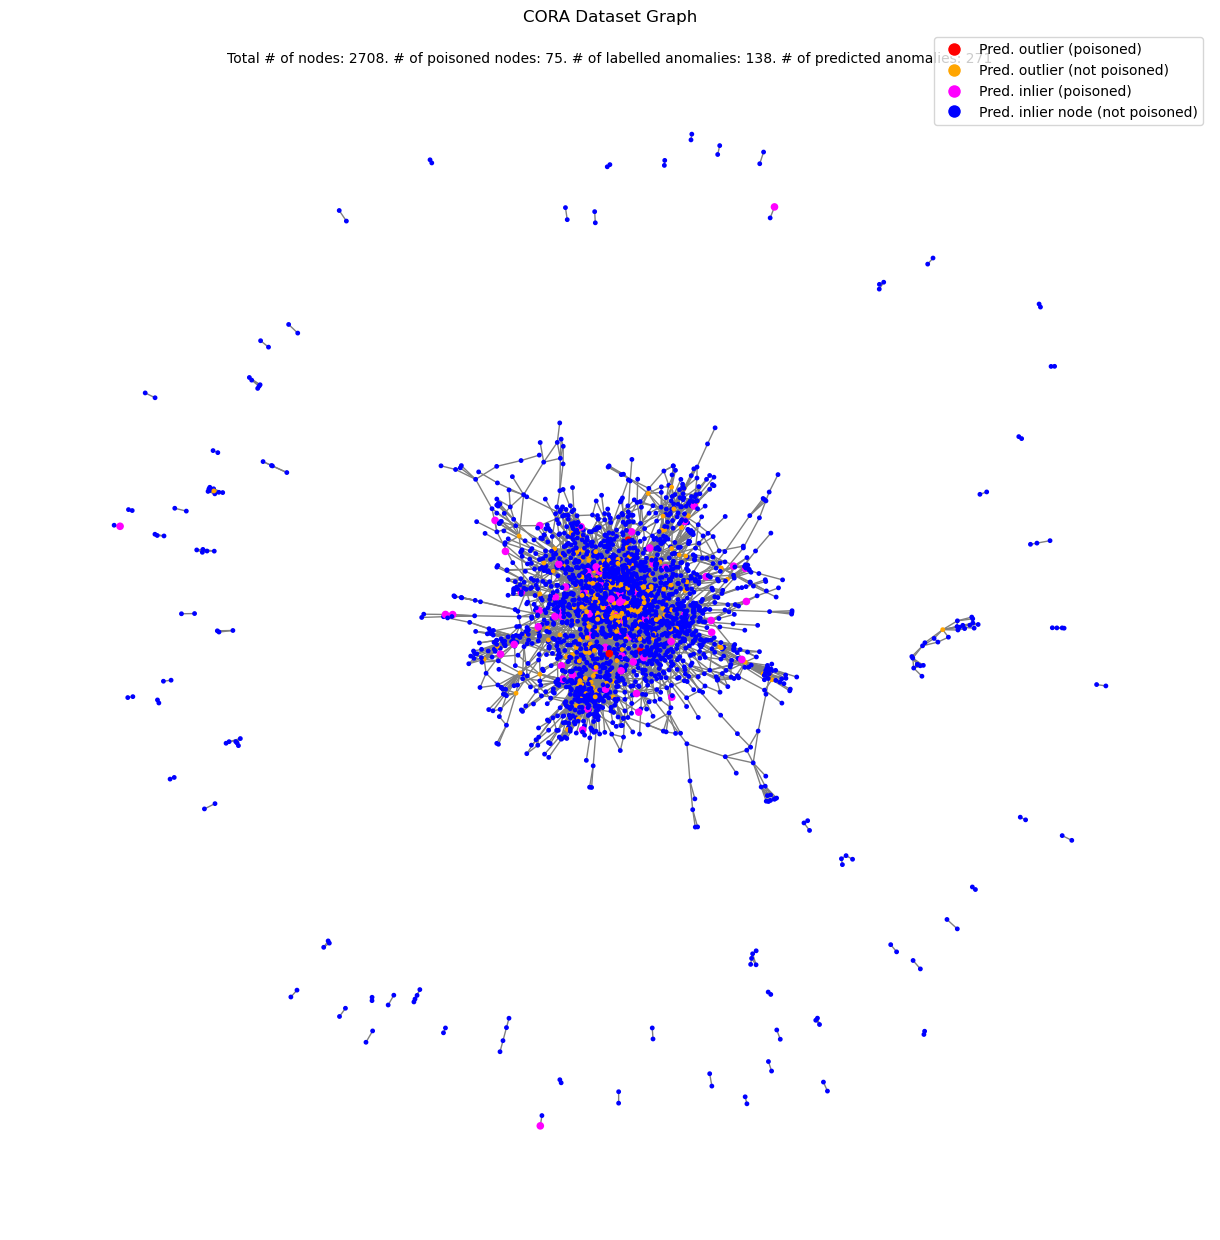

found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found orange prob
found oran

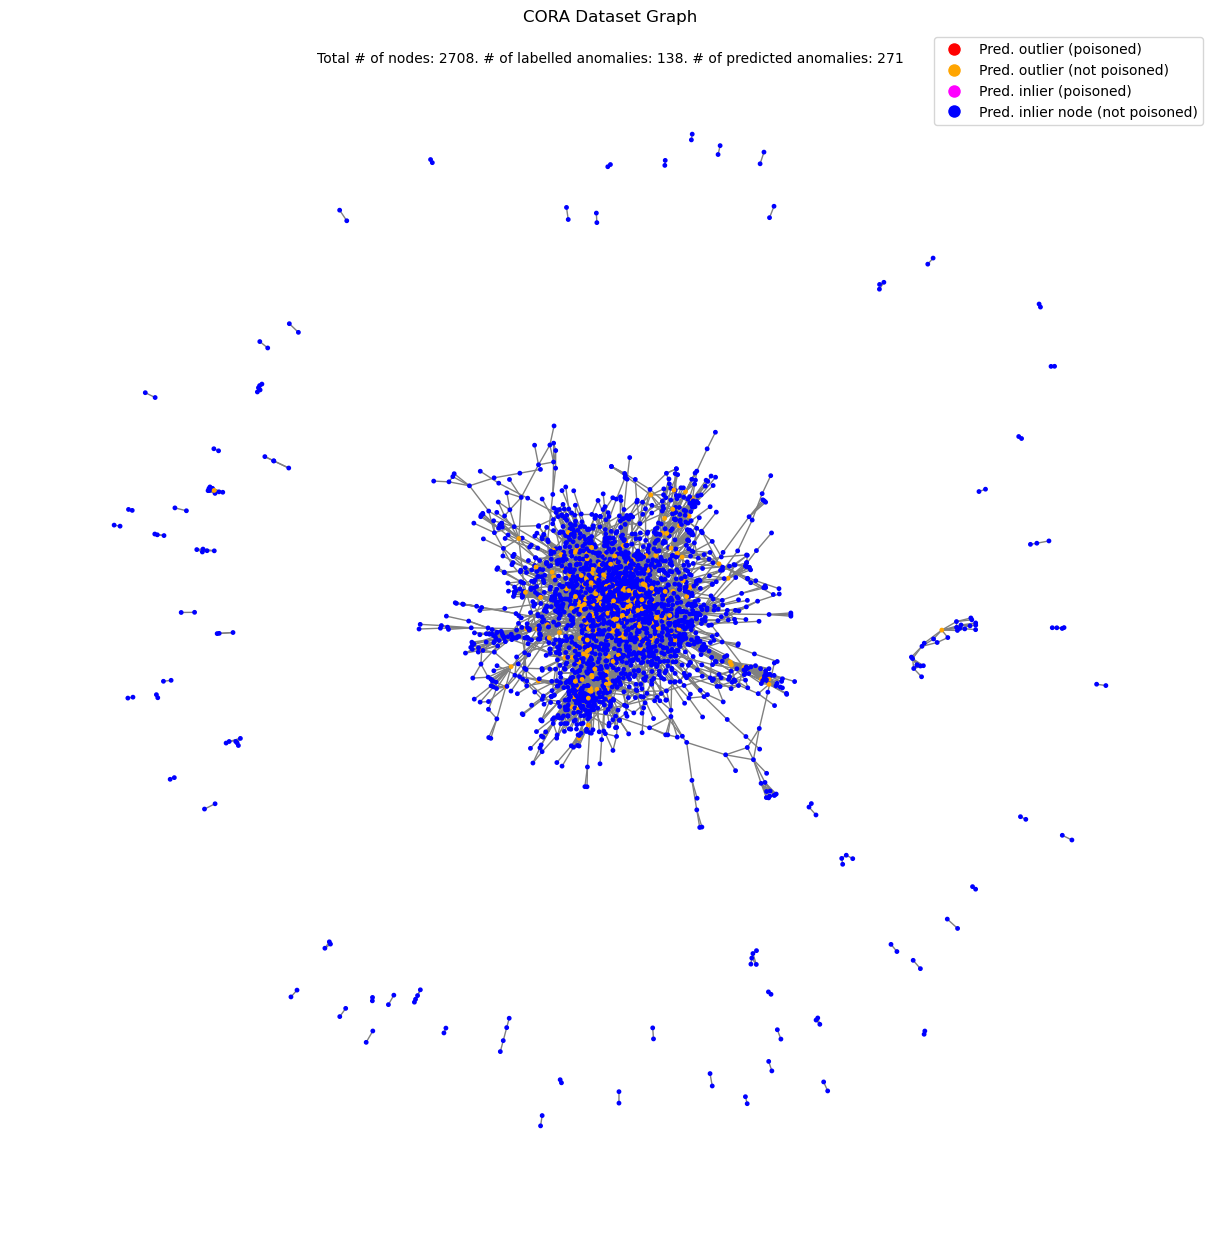

In [6]:
# Convert PyTorch Geometric data to NetworkX graph ---


# assign red to outliers and blue to regular, based on predictions
# for i in range(pred.numel()):
#     if pred[i].item() == 1: 
#         node_colors.append('red')
#     else:
#         node_colors.append('blue')
def count_anomalies():
    count = 0
    for i in y_binary:
        if i == 1:
            count += 1
    
    return count

def count_predicted_anomalies(predictions):
    count = 0
    for i in predictions:
        if i == 1:
            count += 1
    
    return count

    

def visualize_graph(experiment: Experiment, node_idxs = None):
    node_colors = {1: 'red', 2: 'blue', 3: 'green', 4: 'yellow'}

    node_size = []
    if node_idxs is not None:
        for i in range(experiment.pred.numel()):
            if i in node_idxs:
                node_size.append(20)
            else:
                node_size.append(6)


    graph3 = to_networkx(experiment.data, to_undirected=True)
    my_pos = nx.spring_layout(graph3, seed = 100)
    node_colors = []
    for i in range(experiment.pred.numel()):
        if experiment.pred[i].item() == 1 and node_idxs is not None and i in node_idxs: 
            print("found red prob")
            node_colors.append('red')
        elif experiment.pred[i].item() == 1:
            print("found orange prob")
            node_colors.append('orange')
        elif experiment.pred[i].item() == 0 and node_idxs is not None and i in node_idxs:
            print("found yellow prob")
            node_colors.append('magenta')
        else:
            node_colors.append('blue')
        
    # Draws the graph ----
    plt.figure(figsize=(12, 12))
    if node_idxs is not None:
        nx.draw(graph3, pos=my_pos, node_size=node_size, node_color=node_colors, edge_color='gray', with_labels=False)
        text = f'Total # of nodes: {experiment.data.size()[0]}. # of poisoned nodes: {len(node_idxs)}. # of labelled anomalies: {count_anomalies()}. # of predicted anomalies: {count_predicted_anomalies(experiment.pred)}'
        legend_colors = {'red': 'Pred. outlier (poisoned)', 'orange': 'Pred. outlier (not poisoned)', 'magenta': 'Pred. inlier (poisoned)', 'blue': 'Pred. inlier node (not poisoned)'}
    else:
        nx.draw(graph3, pos=my_pos, node_size=6, node_color=node_colors, edge_color='gray', with_labels=False)
        text = f'Total # of nodes: {experiment.data.size()[0]}. # of labelled anomalies: {count_anomalies()}. # of predicted anomalies: {count_predicted_anomalies(experiment.pred)}'
        legend_colors = {'orange': 'Pred. outlier (not poisoned)', 'blue': 'Pred. inlier node (not poisoned)'}

    legend_colors = {'red': 'Pred. outlier (poisoned)', 'orange': 'Pred. outlier (not poisoned)', 'magenta': 'Pred. inlier (poisoned)', 'blue': 'Pred. inlier node (not poisoned)'}
    legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label) for color, label in legend_colors.items()]
    plt.legend(handles=legend_handles, loc='upper right')

    plt.text(0.5, 0.97, text, horizontalalignment='center', verticalalignment='bottom', transform=plt.gca().transAxes)


    plt.title('CORA Dataset Graph')
    plt.show()

#show_graph(experiment_before_poison)
show_graph(experiment_after_poison, node_idxs=node_idxs)
show_graph(experiment_before_poison)
